https://pub.towardsai.net/how-to-detect-outliers-using-visualization-tools-and-statistical-methods-f475b6d99849

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
#Load dataset:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


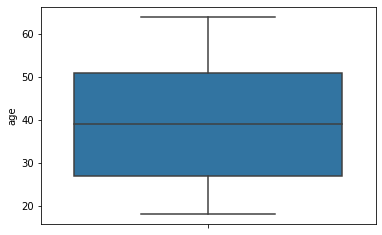

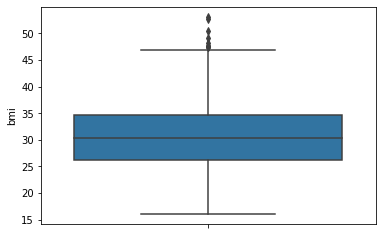

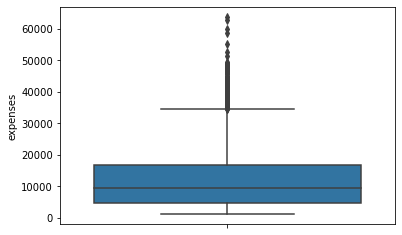

In [11]:
#BoxPlot for age, bmi and expenses:
sns.boxplot(y="age", data=df)
plt.show()
sns.boxplot(y="bmi", data=df)
plt.show()
sns.boxplot(y="expenses", data=df)
plt.show()

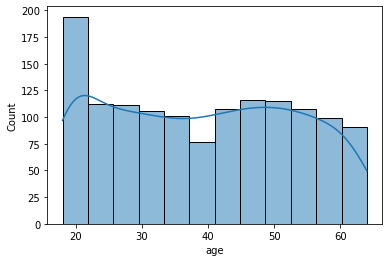

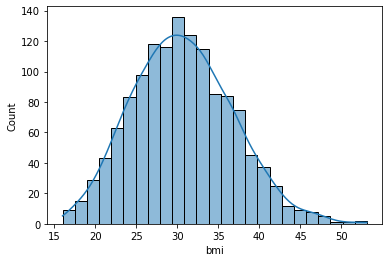

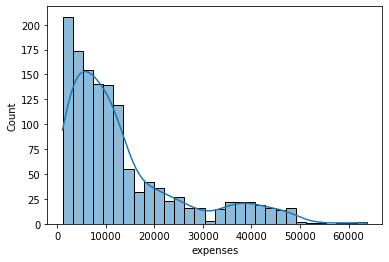

In [12]:
#Histograms for age, bmi and expenses:
sns.histplot(df, x="age", kde=True)
plt.show()
sns.histplot(df, x="bmi", kde=True)
plt.show()
sns.histplot(df, x="expenses", kde=True)
plt.show()

In [7]:
#Drop outliers for bmi and expenses:
df.drop(df[df['bmi'] >= 47].index, inplace = True)
df.drop(df[df['expenses'] >= 50000].index, inplace = True)

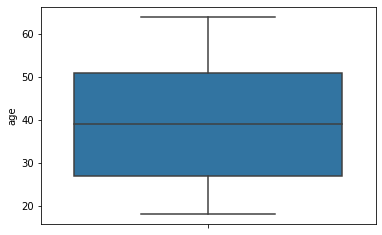

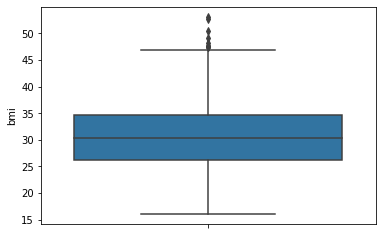

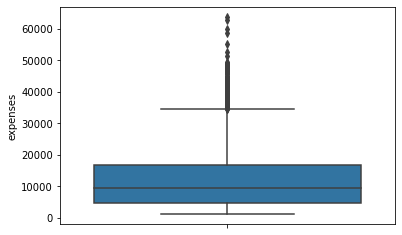

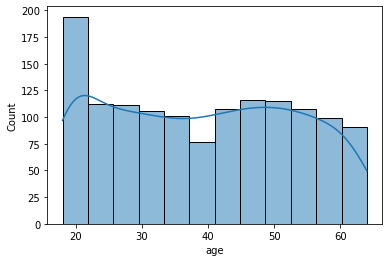

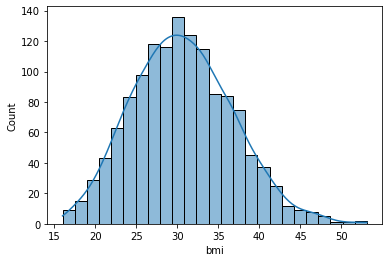

<AxesSubplot:xlabel='expenses', ylabel='Count'>

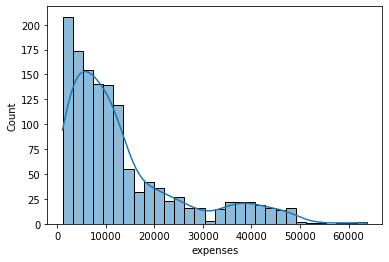

In [13]:
#BoxPlot for age, bmi and expenses:
sns.boxplot(y="age", data=df)
plt.show()
sns.boxplot(y="bmi", data=df)
plt.show()
sns.boxplot(y="expenses", data=df)
plt.show()
#Histograms for age, bmi and expenses:
sns.histplot(df, x="age", kde=True)
plt.show()
sns.histplot(df, x="bmi", kde=True)
plt.show()
sns.histplot(df, x="expenses", kde=True)

In [14]:
#Reload dataset:
df = pd.read_csv('insurance.csv')
#Compute mean and SD for variable age:
mean_age = statistics.mean(df['age'])
stdev_age = statistics.stdev(df['age'])
#Compute z score for variable age:
age_z_score = (df['age']-mean_age)/stdev_age
#Add the new age_z_score variable to df:
df['age_z_score'] = age_z_score.tolist()

In [15]:
#Check for values bellow -3SD:
df.sort_values(by=['age_z_score'], ascending=True)

,age,sex,bmi,children,smoker,region,expenses,age_z_score
1248,18,female,39.8,0,no,southeast,1633.96,-1.509401
482,18,female,31.4,0,no,southeast,1622.19,-1.509401
492,18,female,25.1,0,no,northeast,2196.47,-1.509401
525,18,female,33.9,0,no,southeast,11482.63,-1.509401
529,18,male,25.5,0,no,northeast,1708.00,-1.509401
...,...,...,...,...,...,...,...,...
398,64,male,25.6,2,no,southwest,14988.43,1.764630
335,64,male,34.5,0,no,southwest,13822.80,1.764630
378,64,female,30.1,3,no,northwest,16455.71,1.764630
1265,64,male,23.8,0,yes,southeast,26926.51,1.764630


In [16]:
#Check for values above 3SD:
df.sort_values(by=['age_z_score'], ascending=False)

,age,sex,bmi,children,smoker,region,expenses,age_z_score
335,64,male,34.5,0,no,southwest,13822.80,1.764630
603,64,female,39.1,3,no,southeast,16085.13,1.764630
752,64,male,37.9,0,no,northwest,14210.54,1.764630
1265,64,male,23.8,0,yes,southeast,26926.51,1.764630
534,64,male,40.5,0,no,southeast,13831.12,1.764630
...,...,...,...,...,...,...,...,...
942,18,female,40.2,0,no,northeast,2217.47,-1.509401
46,18,female,38.7,2,no,northeast,3393.36,-1.509401
295,18,male,23.0,0,no,northeast,1704.57,-1.509401
50,18,female,35.6,0,no,northeast,2211.13,-1.509401


In [17]:
#Compute mean and SD for variable bmi:
mean_bmi = statistics.mean(df['bmi'])
stdev_bmi = statistics.stdev(df['bmi'])
#Compute z score for variable bmi:
bmi_z_score = (df['bmi']-mean_bmi)/stdev_bmi
#Add the new age_z_score variable to df:
df['bmi_z_score'] = bmi_z_score.tolist()
#Check for z-score bellow -3SD:
df.sort_values(by=['bmi_z_score'], ascending=True)
#Check for z-score above 3SD:
df.sort_values(by=['bmi_z_score'], ascending=False)

,age,sex,bmi,children,smoker,region,expenses,age_z_score,bmi_z_score
1317,18,male,53.1,0,no,southeast,1163.46,-1.509401,3.678767
1047,22,male,52.6,1,yes,southeast,44501.40,-1.224703,3.596778
847,23,male,50.4,1,no,southeast,2438.06,-1.153528,3.236027
116,58,male,49.1,0,no,southeast,11381.33,1.337582,3.022856
286,46,female,48.1,2,no,northeast,9432.93,0.483487,2.858878
...,...,...,...,...,...,...,...,...,...
1029,37,female,17.3,2,no,northeast,6877.98,-0.157084,-2.191642
412,26,female,17.2,2,yes,northeast,14455.64,-0.940004,-2.208040
1226,38,male,16.8,2,no,northeast,6640.54,-0.085910,-2.273631
428,21,female,16.8,1,no,northeast,3167.46,-1.295877,-2.273631


In [19]:
#Drop values above 3SD:
df.drop(df[df['bmi_z_score'] >= 3].index, inplace = True)

In [21]:
#Compute mean and SD for variable expenses:
mean_expenses = statistics.mean(df['expenses'])
stdev_expenses = statistics.stdev(df['expenses'])
#Compute z score for variable expenses:
expenses_z_score = (df['expenses']-mean_expenses)/stdev_expenses
#Add the new age_z_score variable to df:
df['expenses_z_score'] = expenses_z_score.tolist()
#Check for z-score bellow -3SD:
df.sort_values(by=['expenses_z_score'], ascending=True)
#Check for z-score above 3SD:
df.sort_values(by=['expenses_z_score'], ascending=False)
#Drop values above 3SD:
df.drop(df[df['expenses_z_score'] >= 3].index, inplace = True)

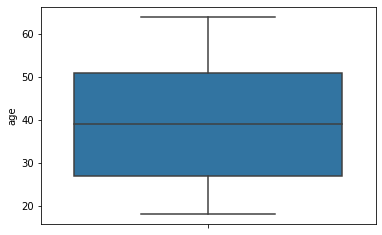

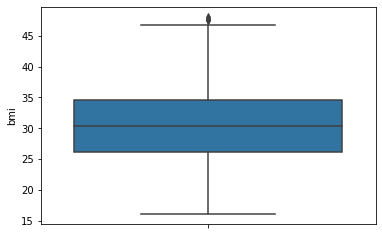

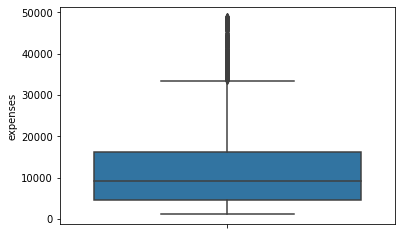

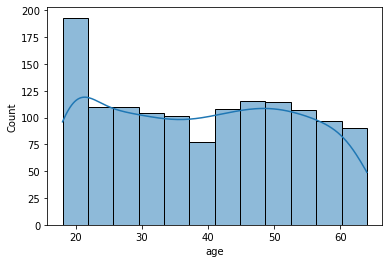

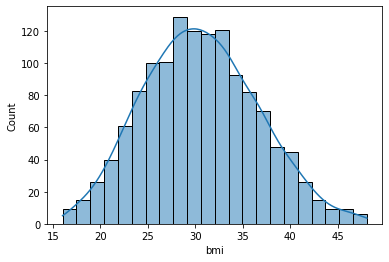

<AxesSubplot:xlabel='expenses', ylabel='Count'>

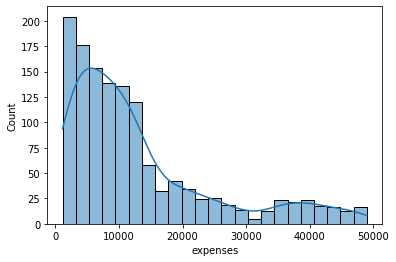

In [22]:
#BoxPlot for age, bmi and expenses:
sns.boxplot(y="age", data=df)
plt.show()
sns.boxplot(y="bmi", data=df)
plt.show()
sns.boxplot(y="expenses", data=df)
plt.show()
#Histograms for age, bmi and expenses:
sns.histplot(df, x="age", kde=True)
plt.show()
sns.histplot(df, x="bmi", kde=True)
plt.show()
sns.histplot(df, x="expenses", kde=True)

In [23]:
#Reload dataset:
df = pd.read_csv('insurance.csv')
#calculate interquartile range of values in the 'age' column
q75_age, q25_age = np.percentile(df['age'], [75 ,25])
iqr_age = q75_age - q25_age
iqr_age
#Compute the boundaries for outlier detection:
age_h_bound = q75_age+(1.5*iqr_age)
age_l_bound = q25_age-(1.5*iqr_age)
print(age_h_bound)
print(age_l_bound)

87.0
-9.0


In [24]:
#Check for lower outliers:
df.sort_values(by=['age'], ascending=True)

,age,sex,bmi,children,smoker,region,expenses
1248,18,female,39.8,0,no,southeast,1633.96
482,18,female,31.4,0,no,southeast,1622.19
492,18,female,25.1,0,no,northeast,2196.47
525,18,female,33.9,0,no,southeast,11482.63
529,18,male,25.5,0,no,northeast,1708.00
...,...,...,...,...,...,...,...
398,64,male,25.6,2,no,southwest,14988.43
335,64,male,34.5,0,no,southwest,13822.80
378,64,female,30.1,3,no,northwest,16455.71
1265,64,male,23.8,0,yes,southeast,26926.51
